<a href="https://colab.research.google.com/github/sirsjosh/Computer-Vision/blob/main/green-screen-hsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HSV colorspace**

Import resources

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
import numpy as np
import cv2

%matplotlib inline

Read in RGB image

In [4]:
# Read in the image
url = 'https://github.com/udacity/cd0360-Introduction-to-Computer-Vision/blob/main/1_1_Image_Representation/images/car_green_screen2.jpg?raw=true'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()),dtype = np.uint8)
image = cv2.imdecode(arr, -1)

# Print out the type of image data and its dimensions (height, width, and color)
print(f'This image is: {type(image)}, with dimensions: {image.shape}')

This image is: <class 'numpy.ndarray'>, with dimensions: (450, 660, 3)


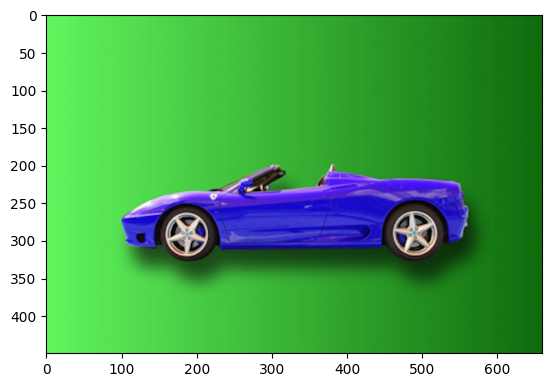

In [5]:
plt.imshow(image)

# RGB threshold

Visualize the green threshold you defined in the previous, consistent green color case.

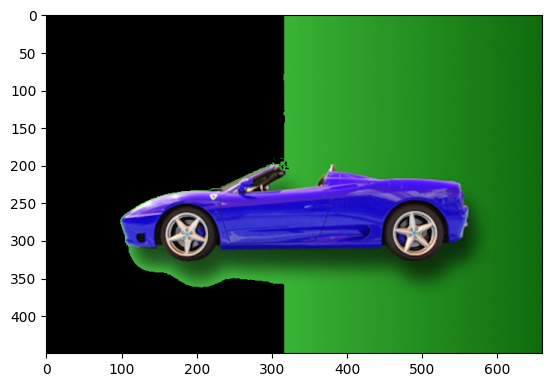

In [6]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0])
upper_green = np.array([100,255,100])

# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

## Convert to HSV

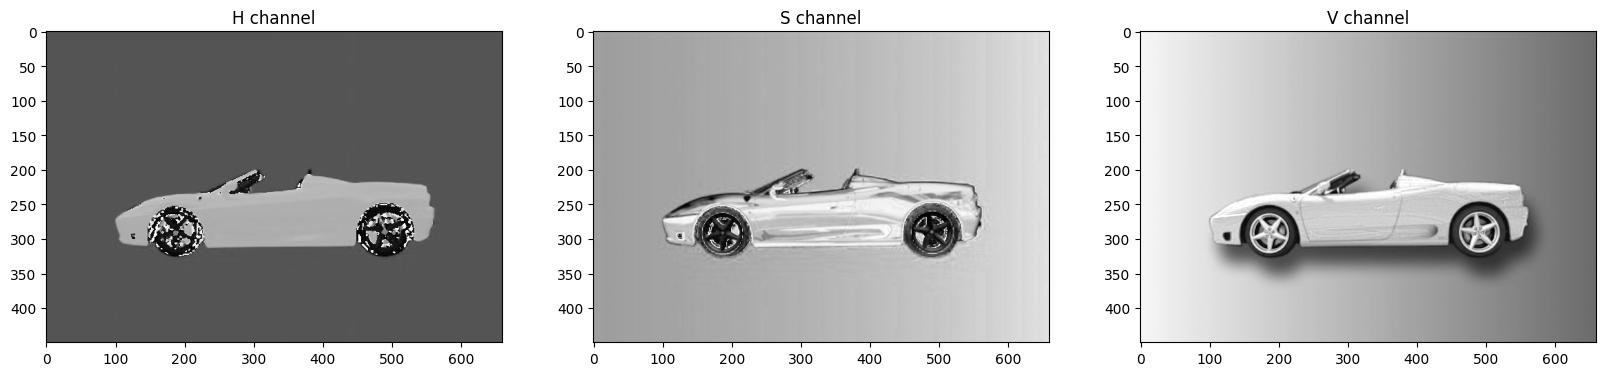

In [7]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

Mask the green area using HSV color space

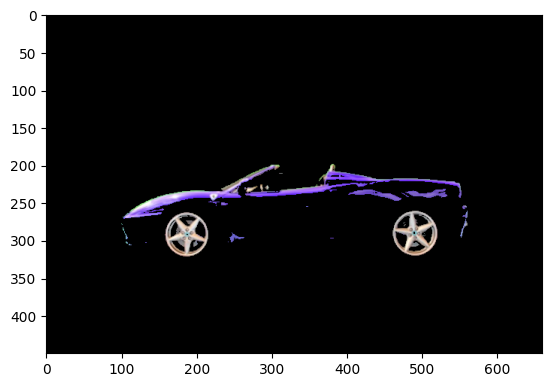

In [19]:
# Define our color selection boundaries in HSV values

## TODO: Change these thresholds
# This initial threshold allows a certain low range for Hue (H)
lower_hue = np.array([0,0,0])
upper_hue = np.array([100,255,255])

# Define the masked area
mask = cv2.inRange(image, lower_hue, upper_hue)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)